<a href="https://colab.research.google.com/github/romeofx/Breast-Cancer-Classification-Using-Artificial-Neural-Networks-ANN/blob/main/BAN6440_Milestone_2_Assignment_MD_Anderson_Cancer_Institute_Cancer_Diagnosis_using_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification Using Artificial Neural Networks (ANN)

## Overview
This Assignment explores the use of Artificial Neural Networks (ANNs) to classify breast cancer tumors as benign or malignant. Using the Breast Cancer Wisconsin (Diagnostic) dataset, the model aims to assist in early detection and diagnosis, improving patient outcomes and supporting clinical decision-making.


**Name**: Calistus Chukwuebuka Ndubuisi  
**Class**: BAN6440 - Applied Machine Learning for Analytics  
**Date**: December 18, 2024

---

## Dataset
- **Source**: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
- **Attributes**:
  - **ID Number**: Unique identifier for each record.
  - **Diagnosis**: Binary classification (M = Malignant, B = Benign).
  - **30 Numerical Features**: Descriptions of cell nuclei based on digitized images, including:
    - Radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

---

## Project Workflow

### 1. Data Preprocessing
- **Loading Data**: The dataset was loaded and inspected to understand its structure and attributes.
- **Exploratory Data Analysis (EDA)**:
  - Identified missing values and unnecessary columns (e.g., `Unnamed: 32`).
  - Visualized data distributions to understand feature variance.
- **Handling Missing Values**: Missing values were imputed using the mean of the respective features.
- **Feature Selection**: Retained relevant features (`diagnosis` and 30 numerical columns).
- **Normalization**: Standardized the dataset using `StandardScaler` to optimize ANN training.

### 2. Model Building
- Designed a sequential ANN using TensorFlow and Keras:
  - **Input Layer**: Matching the number of features in the dataset.
  - **Hidden Layers**: Two layers with 16 neurons each and ReLU activation.
  - **Output Layer**: A single neuron with a Sigmoid activation function for binary classification.
- Compiled the model using the Adam optimizer and binary cross-entropy loss.

### 3. Model Training
- **Training**: Trained the model over 100 epochs with a batch size of 32.
- **Validation**: Used 20% of the dataset as a validation set to monitor performance during training.

### 4. Model Evaluation
- **Performance Metrics**:
  - Accuracy, precision, recall, F1-score.
- **Confusion Matrix**: Visualized to analyze true positives, false positives, true negatives, and false negatives.
- **ROC Curve**: Evaluated the model's ability to distinguish between classes.

### 5. Model Improvement
- **Regularization**: Added dropout layers to prevent overfitting.
- **Hyperparameter Tuning**: Adjusted the number of neurons and learning rate to improve generalization.

---

## Challenges and Solutions

### Challenge: Missing Values
- **Problem**: The dataset contained missing values in some features, including an irrelevant column (`Unnamed: 32`).
- **Solution**: Dropped the unnecessary column and imputed missing values using the `SimpleImputer` with the mean strategy.

### Challenge: Overfitting
- **Problem**: The model performed well on the training set but showed reduced generalization on the validation set.
- **Solution**:
  - Added dropout layers to reduce overfitting.
  - Monitored validation loss during training using early stopping.

---

## Results
- **Test Accuracy**: 0.9737
- **Precision and Recall**: High scores indicating the model's effectiveness in correctly identifying malignant and benign tumors.
- **Confusion Matrix**: Demonstrated minimal misclassification.
- **ROC Curve**: Showed an area under the curve (AUC) close to 1, indicating strong classification performance.

---

## Conclusion
This project demonstrates the potential of using Artificial Neural Networks for breast cancer classification. The ANN model effectively distinguishes between benign and malignant tumors, supporting its application in medical diagnostics. With further improvements, such models can play a crucial role in aiding radiologists and healthcare providers.

---

## Access the Dataset
You can download the dataset from the following link:
[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r'C:\Users\HP\Downloads\data.csv'
df = pd.read_csv(file_path)

# Display the top 10 rows
print(df.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [ ]:
# Drop the 'Unnamed: 32' column
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

# Display the top 10 rows
print(df.head(10))

# Drop unnecessary columns (e.g., 'id') and separate features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode target: Malignant=1, Benign=0

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [ ]:
len(X_train)

455

In [ ]:
len(X_test)

114

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Initialize the ANN
model = Sequential()

# Add an Input layer
model.add(Input(shape=(X_train.shape[1],)))

# First hidden layer
model.add(Dense(units=16, activation='relu'))

# Second hidden layer
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9451 - val_loss: 0.1848
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9451 - val_loss: 0.1862
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9451 - val_loss: 0.1871
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9451 - val_loss: 0.1900
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9451 - val_loss: 0.1902
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9451 - val_loss: 0.1894
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9451 - val_loss: 0.1919
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9451

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1 Score: 0.95


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7149 - loss: 0.6112 - val_accuracy: 0.7895 - val_loss: 0.5195
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8574 - loss: 0.5133 - val_accuracy: 0.8860 - val_loss: 0.4528
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9001 - loss: 0.4340 - val_accuracy: 0.9123 - val_loss: 0.3914
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9015 - loss: 0.3881 - val_accuracy: 0.9298 - val_loss: 0.3344
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8976 - loss: 0.3405 - val_accuracy: 0.9386 - val_loss: 0.2822
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9169 - loss: 0.2755 - val_accuracy: 0.9474 - val_loss: 0.2343
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9492 - loss: 0.2163 - val_accuracy: 0.9561 - val_loss: 0.1954
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 

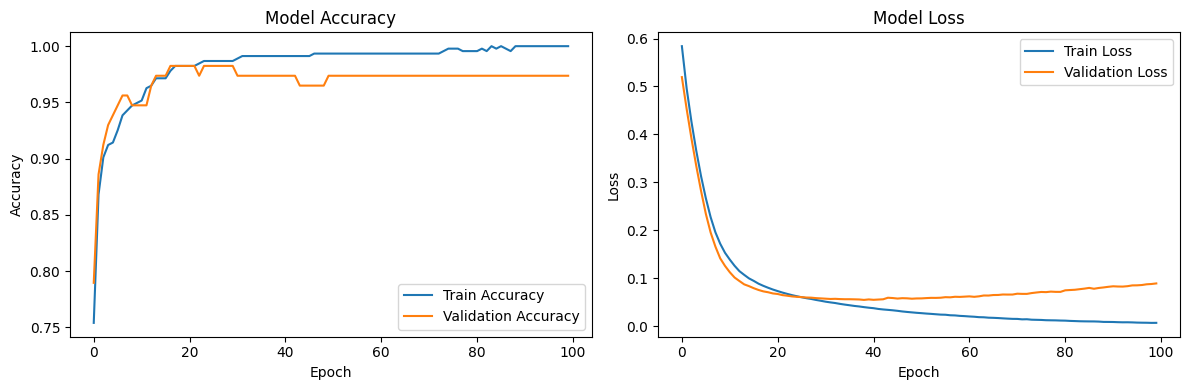

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.1114 
Test Loss: 0.0890
Test Accuracy: 0.9737
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



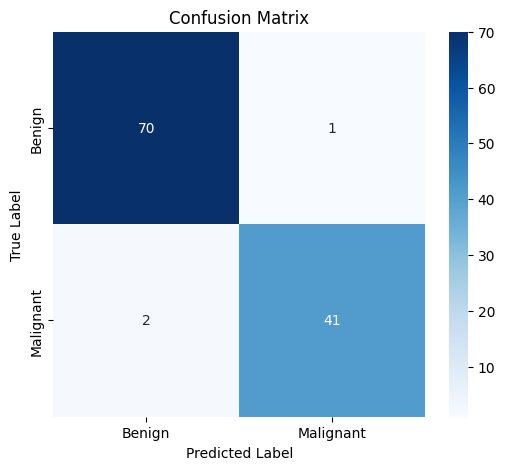

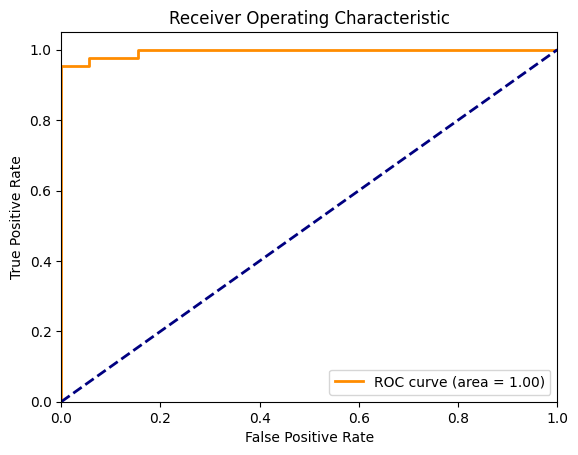

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np


def my_function(input_tensor):
   tf.function(input_signature=[tf.TensorSpec(shape=[None, input_dim], dtype=tf.float32)])


# Initialize the ANN
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=16, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Generate predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
